# Transporte de productos lácteos - Solución

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Transporte</i>

In [1]:
import os
# Por precaución, cambiamos el directorio activo de Python a aquel que contenga este notebook
if "optimizacion" in os.listdir():
    os.chdir(r"optimizacion/Formulaciones/4. Transporte de productos lacteos/")

## Enunciado

<!--  
Conjuntos: $Conjunto$
Indices: $indice \in Conjunto$
Parámetros/variables: $parametro_{ij}$
Tablas: En HTML y los textos de elementos del conjunto en la parte izquierda con alineado a la izquierda. Además a cada tabla se le pone un nombre y su respectiva descripción.
-->

La Lechera Ramírez S.A. es una empresa que produce productos lácteos y cuenta con cuatro plantas de producción en Colombia cuyas capacidades de producción mensuales de leche son 1,500, 1,200, 1,400, y 1,000 litros, respectivamente. Estas cuatro plantas suministran leche a los ocho clientes que actualmente tienen, los cuales son distribuidores minoristas de productos. Las demandas mensuales de leche de estos distribuidores son 930, 600, 460, 610, 830, 460, 640 y 240 litros, respectivamente. La Tabla 1 presenta el costo en el que incurre la compañía al enviar un litro de leche desde cada planta hacia cada distribuidor.

<p style="text-align: center;"><b>Tabla 1. Costos de distribución</b></p>

|            |**Dist. 1**|Dist. 2|Dist. 3|Dist. 4|Dist. 5|Dist. 6|Dist. 7|Dist. 8|
|:----------:|----------:|------:|------:|------:|------:|------:|------:|------:|
|**Planta 1**|650        |125    |1200   |340    |150    |260    |350    |800    |
|**Planta 2**|250        |200    |250    |600    |150    |950    |1050   |1000   |
|**Planta 3**|600        |350    |400    |260    |150    |300    |450    |600    |
|**Planta 4**|450        |800    |650    |250    |340    |700    |600    |620    |

Formula un modelo general de optimización lineal que le permita a La Lechera Ramírez satisfacer la demanda de sus clientes, al menor costo posible.

## Formulación

<!--  
Enumeración alfabetica y en negrilla. En caso de que hayan subliterales, estos van identados, en negrilla y se utiliza "i.", "ii.", ... 
Ejemplo:
**a.**
    **i.**
    **ii.**
**b.**
-->

**a.** Formula matemáticamente un modelo de optimización de forma general que represente la
situación anterior. Defina clara y rigurosamente:  
- Conjuntos
- Parámetros
- Variables de decisión
- Restricciones
- Naturaleza de las variables
- Función objetivo

### Conjuntos
- $P$: Plantas
- $D$: Distribuidores

### Parámetros
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

### Variables de decisión
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

### Restricciones

Se debe respetar la oferta disponible de las plantas:

$$
\sum_{j\in D}x_{ij} \le b_i,\ \forall i\in P;
$$

Se debe satisfacer la demanda de los distribuidores:  

$$
\sum_{i\in P}x_{ij} \ge t_j,\ \forall j\in D;
$$

### Naturaleza de las Variables

No pueden enviarse cantidades negativas de leche:

$$
x_{ij} \ge 0,\ \forall i\in P,j\in D;
$$

### Función objetivo

Se debe minimizar el costo total:

$$
\operatorname{mín}\ \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij}.
$$

## Implementación

**b.** Resuelve el modelo planteado utilizando la librería de PuLP en Python. ¿Cuál es la solución óptima del problema? 

### Librerías

Importa el módulo `matplotlib.pyplot` para crear gráficas, la librería `networkx` para dibujar grafos (redes) y la librería `pulp` para crear y resolver el modelo.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pulp as lp

### Conjuntos

Define los conjuntos `P` y `D` que representan respectivamente las plantas y los distribuidores.

Recuerda que por conveniencia de preservar el orden de los elementos de los conjuntos, no siempre deberás definirlos con el tipo `set`.

In [3]:
# Plantas
P = ["Planta 1", "Planta 2", "Planta 3", "Planta 4"]

# Distribuidores
D = [
    "Distribuidor 1",
    "Distribuidor 2",
    "Distribuidor 3",
    "Distribuidor 4",
    "Distribuidor 5",
    "Distribuidor 6",
    "Distribuidor 7",
    "Distribuidor 8",
]

### Parámetros

Define o importa los parámetros del modelo.

In [4]:
# Oferta de la planta i en I
b = {
    "Planta 1": 1500,
    "Planta 2": 1200,
    "Planta 3": 1400,
    "Planta 4": 1000,
}

# Demanda del distribuidor j en D
t = {  
    "Distribuidor 1": 930,
    "Distribuidor 2": 600,
    "Distribuidor 3": 460,
    "Distribuidor 4": 610,
    "Distribuidor 5": 830,
    "Distribuidor 6": 460,
    "Distribuidor 7": 640,
    "Distribuidor 8": 240,
}

# Costo de envio de un litro de leche desde la planta i en P al distribuidor j en D.
c = {
    ("Planta 1", "Distribuidor 1"): 650,
    ("Planta 1", "Distribuidor 2"): 125,
    ("Planta 1", "Distribuidor 3"): 1200,
    ("Planta 1", "Distribuidor 4"): 340,
    ("Planta 1", "Distribuidor 5"): 150,
    ("Planta 1", "Distribuidor 6"): 260,
    ("Planta 1", "Distribuidor 7"): 350,
    ("Planta 1", "Distribuidor 8"): 800,
    ("Planta 2", "Distribuidor 1"): 250,
    ("Planta 2", "Distribuidor 2"): 200,
    ("Planta 2", "Distribuidor 3"): 250,
    ("Planta 2", "Distribuidor 4"): 600,
    ("Planta 2", "Distribuidor 5"): 150,
    ("Planta 2", "Distribuidor 6"): 950,
    ("Planta 2", "Distribuidor 7"): 1050,
    ("Planta 2", "Distribuidor 8"): 1000,
    ("Planta 3", "Distribuidor 1"): 600,
    ("Planta 3", "Distribuidor 2"): 350,
    ("Planta 3", "Distribuidor 3"): 400,
    ("Planta 3", "Distribuidor 4"): 260,
    ("Planta 3", "Distribuidor 5"): 150,
    ("Planta 3", "Distribuidor 6"): 300,
    ("Planta 3", "Distribuidor 7"): 450,
    ("Planta 3", "Distribuidor 8"): 600,
    ("Planta 4", "Distribuidor 1"): 450,
    ("Planta 4", "Distribuidor 2"): 800,
    ("Planta 4", "Distribuidor 3"): 650,
    ("Planta 4", "Distribuidor 4"): 250,
    ("Planta 4", "Distribuidor 5"): 340,
    ("Planta 4", "Distribuidor 6"): 700,
    ("Planta 4", "Distribuidor 7"): 600,
    ("Planta 4", "Distribuidor 8"): 620,
}

### Objeto del modelo

Construye un problema al que luego agregarás las restricciones y la función objetivo.

In [5]:
problema = lp.LpProblem(name="Transporte", sense=lp.LpMinimize)

### Variables de decisión

Define las variables del problema de manera que estén contenidas en diccionarios indexados en los conjuntos de sus variables respectivas.

In [6]:
# litros de leche que van de la planta i en P al distribuidor j en D
x = {
    (i, j): lp.LpVariable(
        name=f"litros_planta_{i}_distribuidor_{j}",
        lowBound=0,
        upBound=None,
        cat=lp.LpContinuous,
    )
    for i in P
    for j in D
}

### Función objetivo

Agrega al problema la función objetivo. Recuerda que al definir el problema, ya definiste si este es de maximización o minimización.

In [7]:
problema += sum(c[i, j] * x[i, j] for i in P for j in D), "costos_totales"

### Restricciones

Agrega al problema las restricciones del modelo.

In [8]:
# Se respeta la oferta de cada planta
for i in P:
    problema += (
        sum(x[i, j] for j in D) <= b[i],
        f"oferta_planta_{i}",
    )

# Se satisface la demanda de cada distribuidor
for j in D:
    problema += (
        sum(x[i, j] for i in P) >= t[j],
        f"demanda_distribuidor_{j}",
    )

### Resolver el problema

Invoca el optimizador. Este paso le asigna un valor a las variables incluidas en las restricciones o función objetivo del modelo.

In [9]:
problema.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /tmp/047f7066e5bf481b947955a84f73dfe1-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/047f7066e5bf481b947955a84f73dfe1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 17 COLUMNS
At line 114 RHS
At line 127 BOUNDS
At line 128 ENDATA
Problem MODEL has 12 rows, 32 columns and 64 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 12 (0) rows, 32 (0) columns and 64 (0) elements
0  Obj 0 Primal inf 4770 (8)
13  Obj 1224800
Optimal - objective value 1224800
Optimal objective 1224800 - 13 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

### Imprimir resultados

Antes de estudiar el óptimo del modelo, identifica en el estado del optimizador si pudo resolver el problema.

In [10]:
f"Estado del optimizador: {lp.LpStatus[problema.status]}"

'Estado del optimizador: Optimal'

Identifica también el valor de la función objetivo.

In [11]:
f"Costo total: {lp.value(problema.objective)}"

'Costo total: 1224800.0'

Por último, imprime de manera estructurada el valor de las variables de decisión y otras expresiones de interés.

In [12]:
for j in D:
    print(f"\t{j}", end="")
print()

for i in P:
    print(i, end="\t")
    for j in D:
        print(lp.value(x[i, j]), end="\t")
    print()

	Distribuidor 1	Distribuidor 2	Distribuidor 3	Distribuidor 4	Distribuidor 5	Distribuidor 6	Distribuidor 7	Distribuidor 8
Planta 1	0.0	600.0	0.0	0.0	0.0	260.0	640.0	0.0	
Planta 2	930.0	0.0	270.0	0.0	0.0	0.0	0.0	0.0	
Planta 3	0.0	0.0	190.0	0.0	830.0	200.0	0.0	180.0	
Planta 4	0.0	0.0	0.0	610.0	0.0	0.0	0.0	60.0	


### Visualizar resultados

Ahora que conoces el valor de las variables de decisión, desarrolla una gráfica que ilustre la red de distribución y los envíos dentro de la misma. Utiliza las ubicaciones definidas a continuación.

In [13]:
# Coordenadas de las plantas
coordenadas_plantas = {
    "Planta 1": (9.5, 12),
    "Planta 2": (7, 5),
    "Planta 3": (5, 14),
    "Planta 4": (2.5, 9.5),
}

# Coordenadas de los distribuidores
coordenadas_distribuidores = {
    "Distribuidor 1": (5.5, 9),
    "Distribuidor 2": (8, 9),
    "Distribuidor 3": (5, 8),
    "Distribuidor 4": (6, 10),
    "Distribuidor 5": (7, 10),
    "Distribuidor 6": (7.5, 15),
    "Distribuidor 7": (8, 17),
    "Distribuidor 8": (1, 15),
}

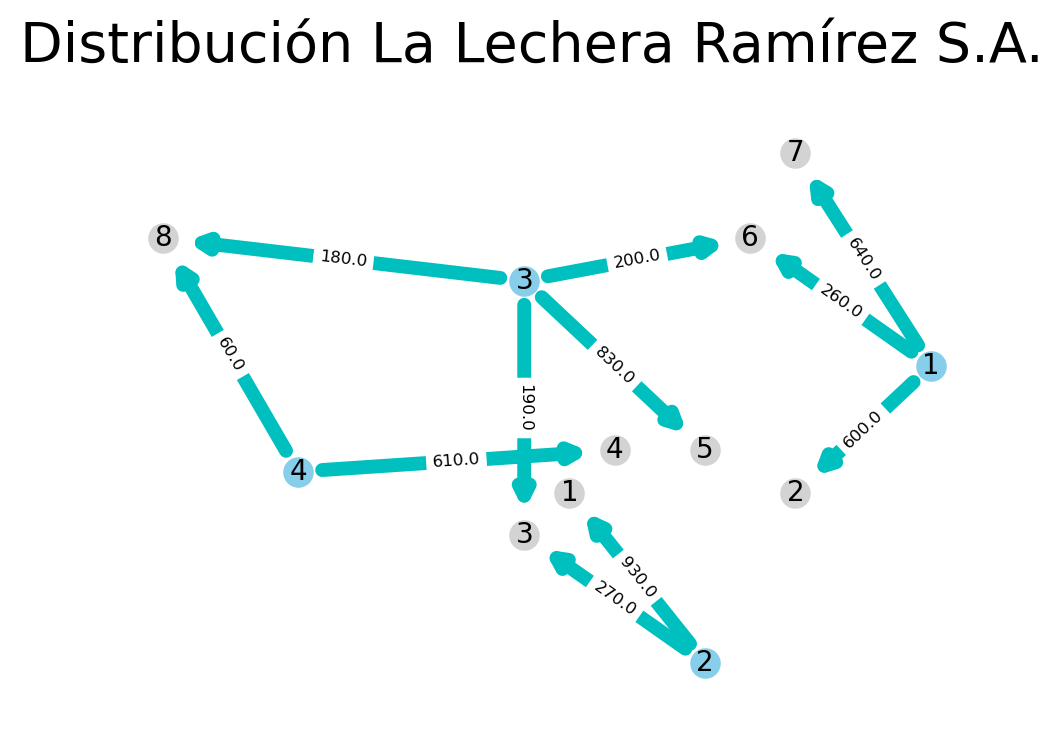

In [14]:
# Se crean dos conjuntos auxiliares para los labels de los nodos de las plantas y distribuidores
labels_plantas = {P[i]: i + 1 for i in range(len(P))}
labels_distribuidores = {D[j]: j + 1 for j in range(len(D))}

# Se crea un conjunto auxiliar para los labels de los arcos
coordenadas = coordenadas_plantas
coordenadas.update(coordenadas_distribuidores)

# Se guarda la solución en un vector
xSol = {(i, j): lp.value(x[i, j]) for i in P for j in D if lp.value(x[i, j]) > 0.01}

# Se modifican las dimensiones de la visualización
plt.rcParams["figure.figsize"] = 6, 4
plt.rcParams["figure.dpi"] = 200

# Creación de un modelo de grafos dirigidos.
G = nx.DiGraph()

# Dibujar los nodos de plantas y distribuidores.
nx.draw_networkx_nodes(
    G, coordenadas_plantas, nodelist=P, node_color="skyblue", node_size=100
)
nx.draw_networkx_nodes(
    G, coordenadas_distribuidores, nodelist=D, node_color="lightgray", node_size=100
)

# Dibujar los labels de los nodos de plantas y distribuidores.
nx.draw_networkx_labels(G, coordenadas_plantas, labels_plantas, font_size=10)
nx.draw_networkx_labels(
    G, coordenadas_distribuidores, labels_distribuidores, font_size=10
)

# Dibujar arcos del diagrama con sus respectivos litros de leche enviados.
nx.draw_networkx_edges(G, coordenadas, xSol, width=5, edge_color="c", arrows=True)
nx.draw_networkx_edge_labels(G, coordenadas, edge_labels=xSol, font_size=6)
nx.draw_networkx(G, coordenadas, with_labels=True)

# Borrar ejes, agregar titulo y mostrar la ventana del diagrama.
plt.axis("off")
nx.draw(G)
plt.suptitle("Distribución La Lechera Ramírez S.A.", fontsize=20)
plt.show()

## Créditos

Equipo Principios de Optimización<br>
Autores: Camilo Aguilar, Juan Felipe Rengifo<br>
Desarrollo: Camilo Aguilar, Juan Felipe Rengifo, Alejandro Mantilla<br>
Última fecha de modificación: 07/04/2023